# Part1 : Asking questions

## 1.Who is risky? (Which type of person is the riskiest?)

## 2.How well do loan grades predict actual default rates?

## 3.At what level should we set the DTI threshold to balance risk reduction and customer retention?
  


# Part 2 : Prepare data

## Set up library
## Explore data 

In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import opendatasets as od
import plotly.express as px
import matplotlib.patches as mpatches

od.download("https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data") 

df = pd.read_csv("credit-risk-dataset/credit_risk_dataset.csv")


Skipping, found downloaded files in ".\credit-risk-dataset" (use force=True to force download)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [3]:
df.describe()  #Outlier data max person_age = 144????

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [4]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.isna().sum() #nan data 

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
df.duplicated().sum() #duplicated data

np.int64(165)

# Part 3 : Data cleaning

## Delete duplicate data,Clean nan data by median value, Clean outlier data 

In [7]:
#delete duplicate

df_cleaned = df.drop_duplicates().copy()

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [8]:
df_cleaned.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
df_cleaned[df_cleaned['person_emp_length'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [10]:
df_cleaned.pivot_table(index='person_age', columns='loan_grade', values='person_income', aggfunc='size') 

loan_grade,A,B,C,D,E,F,G
person_age,,,,,,,
20,4.0,5.0,2.0,4.0,NaN,NaN,NaN
21,403.0,377.0,244.0,157.0,28.0,4.0,NaN
22,1164.0,1182.0,725.0,416.0,95.0,22.0,3.0
23,1297.0,1283.0,757.0,380.0,102.0,35.0,7.0
24,1211.0,1126.0,639.0,397.0,123.0,24.0,6.0
25,974.0,951.0,634.0,328.0,108.0,25.0,3.0
26,836.0,788.0,475.0,277.0,67.0,13.0,6.0
27,695.0,698.0,411.0,243.0,58.0,16.0,6.0
28,588.0,580.0,380.0,212.0,59.0,21.0,8.0


In [11]:
#clean outlier data 

df_cleaned = df_cleaned[df_cleaned['person_age'] <= 80]

In [12]:
df_cleaned.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32409.000000,3.240900e+04,31522.000000,32409.000000,29316.000000,32409.000000,32409.000000,32409.000000
mean,27.726588,6.589836e+04,4.790559,9593.674597,11.017237,0.218736,0.170258,5.809837
std,6.191834,5.252179e+04,4.145613,6322.701056,3.241836,0.413395,0.106809,4.054975
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12250.000000,13.472500,0.000000,0.230000,8.000000
max,80.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [13]:
df_cleaned.pivot_table(index='person_emp_length', columns='loan_grade', values='person_income', aggfunc='size') 

loan_grade,A,B,C,D,E,F,G
person_emp_length,,,,,,,
0.0,1293.0,1218.0,919.0,455.0,153.0,40.0,8.0
1.0,800.0,969.0,649.0,349.0,100.0,27.0,2.0
2.0,1108.0,1298.0,782.0,460.0,139.0,36.0,7.0
3.0,1064.0,1120.0,738.0,389.0,107.0,21.0,3.0
4.0,911.0,882.0,592.0,375.0,77.0,15.0,9.0
5.0,989.0,1021.0,514.0,307.0,72.0,19.0,4.0
6.0,942.0,844.0,515.0,267.0,67.0,15.0,2.0
7.0,743.0,712.0,431.0,232.0,39.0,20.0,8.0
8.0,623.0,516.0,293.0,184.0,40.0,15.0,5.0


In [14]:
df_cleaned = df_cleaned[df_cleaned['person_emp_length'] <= 41]

(0.0, 300000.0)

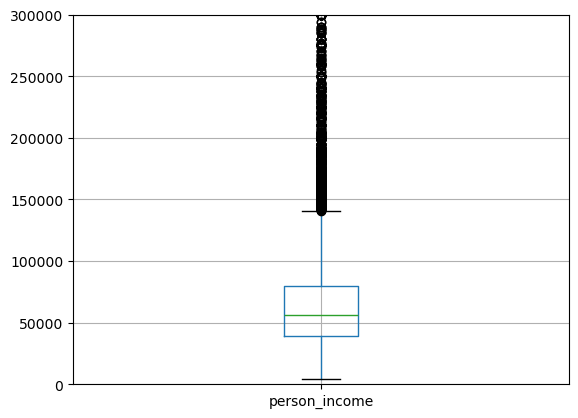

In [15]:
df_cleaned.boxplot(column='person_income')

plt.ylim(0,300000)

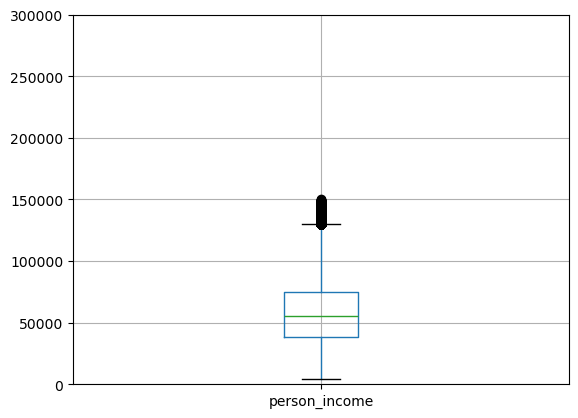

In [16]:
df_cleaned = df_cleaned[df_cleaned['person_income'] < 150000]

df_cleaned.boxplot(column='person_income')

plt.ylim(0,300000)
plt.show()

In [17]:
#check data 
df_cleaned.describe()

#Observations decreased from 32,581 to 30,246 after data cleaning


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,30246.000000,30246.000000,30246.000000,30246.000000,27340.000000,30246.000000,30246.000000,30246.000000
mean,27.619950,59753.016564,4.710143,9390.029260,11.031185,0.221418,0.173342,5.741586
std,6.141863,28174.511443,3.970048,6075.936308,3.227799,0.415208,0.106507,4.014399
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000
25%,23.000000,38400.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,54996.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,75000.000000,7.000000,12000.000000,13.480000,0.000000,0.230000,8.000000
max,80.000000,149981.000000,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [18]:
#Replace missing values with the median

df_cleaned.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2906
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [19]:
median_loan_int_rate = df_cleaned['loan_int_rate'].median()

df_cleaned['loan_int_rate'] = df_cleaned['loan_int_rate'].fillna(median_loan_int_rate)

In [20]:
df_cleaned.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# Part 4 Analyze Data

## Create Visualizations to find insight

In [21]:
df_cleaned.groupby('loan_intent').count()['loan_status']

loan_intent
DEBTCONSOLIDATION    4830
EDUCATION            6030
HOMEIMPROVEMENT      3309
MEDICAL              5678
PERSONAL             5115
VENTURE              5284
Name: loan_status, dtype: int64

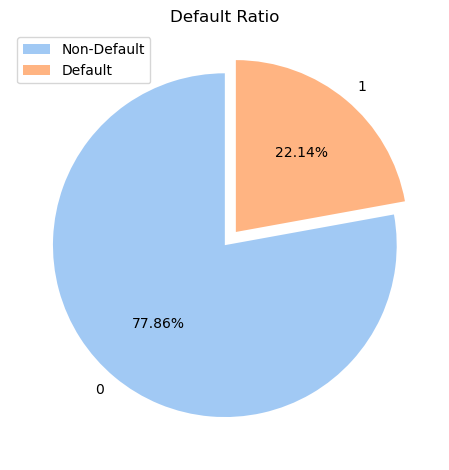

In [22]:
pastel = sns.color_palette('pastel')

df_cleaned['loan_status'].value_counts().plot(kind='pie' , startangle=90, autopct='%1.2f%%', colors=pastel, explode=(0, 0.1))
plt.title('Default Ratio')
plt.legend(labels=['Non-Default', 'Default'])
plt.ylabel('')
plt.tight_layout()
plt.show()

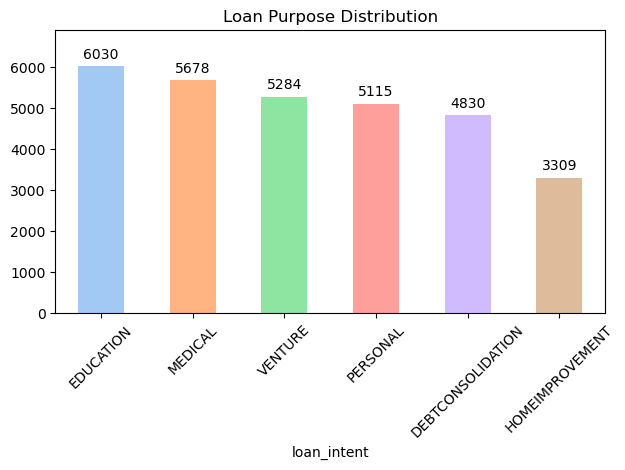

In [23]:
ax = df_cleaned['loan_intent'].value_counts().plot(kind='bar',color=pastel)
plt.title('Loan Purpose Distribution')
plt.bar_label(ax.containers[0], label_type='edge', padding=3, fontsize=10)
plt.ylabel('')
plt.ylim(0,6000 *1.15)
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

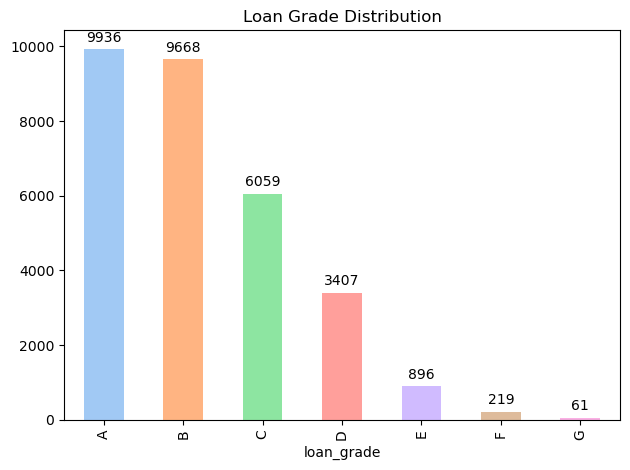

In [24]:
ax3 = df_cleaned['loan_grade'].value_counts().plot(kind='bar' , color=pastel)

ax3.bar_label(ax3.containers[0], label_type='edge', padding=3, fontsize=10)
plt.title('Loan Grade Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [25]:
df_cleaned['person_age'].value_counts().sort_index()

person_age
20      13
21    1150
22    3461
23    3693
24    3353
25    2812
26    2296
27    1995
28    1714
29    1545
30    1179
31    1041
32     876
33     788
34     644
35     567
36     493
37     437
38     342
39     268
40     235
41     218
42     164
43     145
44     128
45     104
46      86
47      82
48      72
49      46
50      47
51      34
52      33
53      28
54      22
55      20
56      11
57      14
58      16
59       4
60      13
61       7
62       7
63       2
64       7
65       9
66       8
69       5
70       6
73       3
76       1
78       1
80       1
Name: count, dtype: int64

In [26]:
#Created age bins

df_cleaned['age_group'] = pd.cut(df_cleaned['person_age'],
                           bins=[19, 25, 30, 35, 40, 45, 50, 55, 60, 100],
                           labels=['20-25', '26-30', '31-35', '36-40', '41-45', '46-50','51-55','56-60', '>60'])

In [27]:
# To verify if the age ranges align with the requirements.

df_cleaned[df['person_age'] == 61]

C:\Users\Admin\AppData\Local\Temp\ipykernel_16584\3856190594.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned[df['person_age'] == 61]


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group
32322,61,51000,RENT,2.0,MEDICAL,D,20000,14.09,1,0.39,N,21,>60
32419,61,53000,MORTGAGE,3.0,PERSONAL,A,7000,7.49,0,0.13,N,23,>60
32466,61,10636,RENT,3.0,PERSONAL,B,4000,12.21,1,0.38,N,25,>60
32477,61,90000,RENT,1.0,MEDICAL,A,10000,5.79,0,0.11,N,20,>60
32489,61,85000,MORTGAGE,11.0,PERSONAL,B,9000,9.99,0,0.11,N,22,>60
32498,61,78000,MORTGAGE,1.0,PERSONAL,D,8525,14.54,1,0.11,Y,27,>60
32539,61,148000,MORTGAGE,30.0,DEBTCONSOLIDATION,B,24000,10.38,1,0.16,N,20,>60


In [28]:
age_group_ratio = df_cleaned.pivot_table(index='age_group', columns='loan_status',values='loan_amnt', aggfunc='size')

age_group_ratio


C:\Users\Admin\AppData\Local\Temp\ipykernel_16584\2148277876.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_group_ratio = df_cleaned.pivot_table(index='age_group', columns='loan_status',values='loan_amnt', aggfunc='size')


loan_status,0,1
age_group,,
20-25,11114,3368
26-30,6877,1852
31-35,3111,805
36-40,1401,374
41-45,596,163
46-50,267,66
51-55,100,37
56-60,43,15
>60,40,17


In [29]:
age_group_ratio['total'] = age_group_ratio[0] + age_group_ratio[1]

age_group_ratio['default_rate'] = ((age_group_ratio[1] / age_group_ratio['total']) * 100).round(2)

age_group_ratio

loan_status,0,1,total,default_rate
age_group,,,,
20-25,11114,3368,14482,23.26
26-30,6877,1852,8729,21.22
31-35,3111,805,3916,20.56
36-40,1401,374,1775,21.07
41-45,596,163,759,21.48
46-50,267,66,333,19.82
51-55,100,37,137,27.01
56-60,43,15,58,25.86
>60,40,17,57,29.82


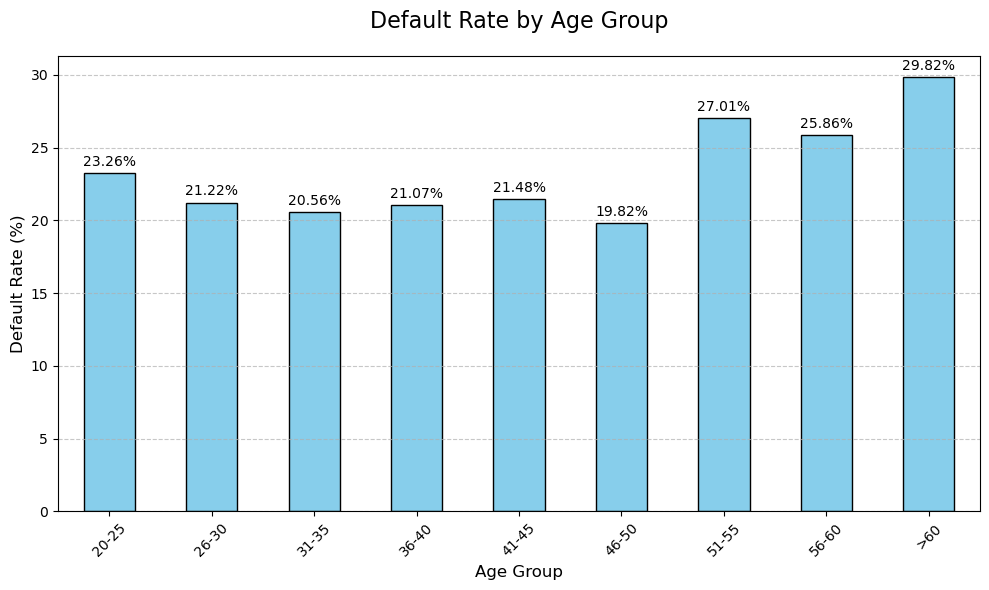

In [30]:
plt.figure(figsize=(10, 6))

ax = age_group_ratio['default_rate'].plot(kind='bar', color='skyblue', edgecolor='black')

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f%%')

plt.title('Default Rate by Age Group', fontsize=16, pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout()
plt.show()

In [31]:
df_cleaned['person_income'].sort_values()

31930      4000
15964      4080
15963      4200
15960      4800
15961      4800
          ...  
15590    149385
16132    149385
15591    149400
27539    149616
15593    149981
Name: person_income, Length: 30246, dtype: int64

In [32]:
df_cleaned['income_group'] = pd.cut(df_cleaned['person_income'],
                           bins=[0, 40000, 80000, float('inf')],
                           labels=['low', 'mid', 'high'])


In [33]:
# To verify if the income ranges align with the requirements.

df_cleaned[df_cleaned['person_income'] > 79999].sort_values(by='person_income', ascending=True)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group
31174,43,80000,MORTGAGE,3.0,VENTURE,A,9800,5.99,0,0.12,N,17,41-45,mid
25139,28,80000,MORTGAGE,1.0,PERSONAL,A,3100,7.05,0,0.04,N,9,26-30,mid
32119,36,80000,MORTGAGE,9.0,VENTURE,C,6000,10.99,0,0.07,Y,14,36-40,mid
25143,27,80000,MORTGAGE,11.0,PERSONAL,B,20000,10.99,0,0.25,N,10,26-30,mid
25145,28,80000,MORTGAGE,12.0,DEBTCONSOLIDATION,B,12000,12.18,0,0.15,N,5,26-30,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15590,23,149385,OWN,7.0,VENTURE,A,7000,8.94,0,0.05,N,4,20-25,high
16132,23,149385,OWN,7.0,PERSONAL,A,7000,8.94,0,0.05,N,2,20-25,high
15591,26,149400,MORTGAGE,1.0,MEDICAL,A,7000,6.62,0,0.05,N,3,26-30,high
27539,27,149616,OWN,0.0,MEDICAL,C,15000,11.03,0,0.10,N,10,26-30,high


In [34]:
income_group_ratio = df_cleaned.pivot_table(index='income_group', columns='loan_status',values='loan_amnt', aggfunc='size')

income_group_ratio


C:\Users\Admin\AppData\Local\Temp\ipykernel_16584\648613599.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  income_group_ratio = df_cleaned.pivot_table(index='income_group', columns='loan_status',values='loan_amnt', aggfunc='size')


loan_status,0,1
income_group,,
low,5457,3260
mid,12431,2835
high,5661,602


In [35]:
income_group_ratio['total'] = income_group_ratio[0] + income_group_ratio[1]

income_group_ratio

loan_status,0,1,total
income_group,,,
low,5457,3260,8717
mid,12431,2835,15266
high,5661,602,6263


In [36]:
income_group_ratio['default_rate'] = ((income_group_ratio[1] / income_group_ratio['total']) * 100 ).round(2)

income_group_ratio

loan_status,0,1,total,default_rate
income_group,,,,
low,5457,3260,8717,37.40
mid,12431,2835,15266,18.57
high,5661,602,6263,9.61


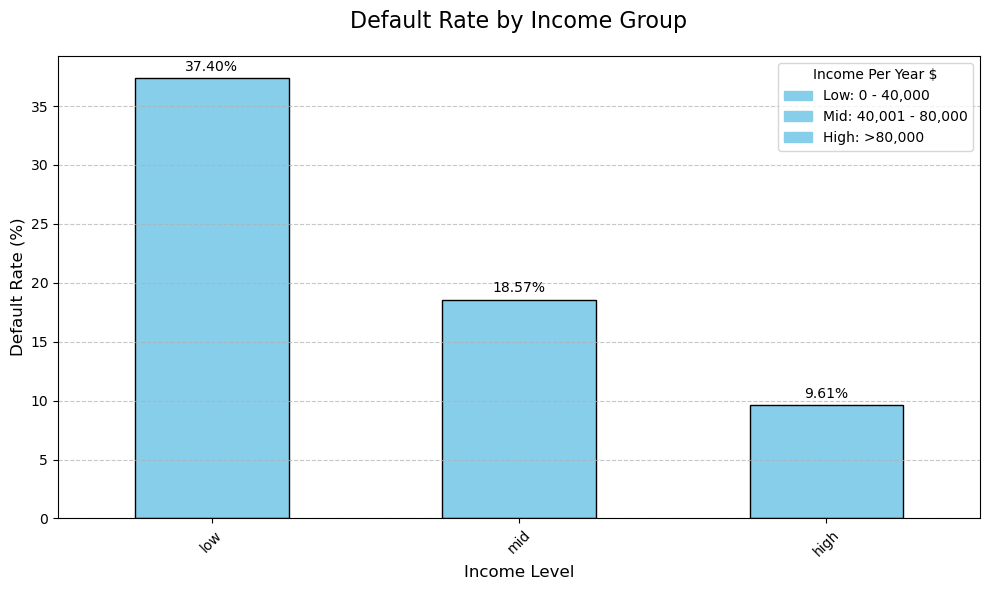

In [37]:
plt.figure(figsize=(10, 6))

ax = income_group_ratio['default_rate'].plot(kind='bar', color='skyblue', edgecolor='black')

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f%%')

low_patch = mpatches.Patch(color='skyblue', label='Low: 0 - 40,000')
mid_patch = mpatches.Patch(color='skyblue', label='Mid: 40,001 - 80,000')
high_patch = mpatches.Patch(color='skyblue', label='High: >80,000')


ax.legend(handles=[low_patch, mid_patch, high_patch], 
          title="Income Per Year $", 
          loc='upper right')
          

plt.title('Default Rate by Income Group', fontsize=16, pad=20)
plt.xlabel('Income Level', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 


plt.tight_layout()
plt.show()

In [38]:
df_cleaned['person_income'].sort_values(ascending=False)

15593    149981
27539    149616
15591    149400
16132    149385
15590    149385
          ...  
15961      4800
15962      4800
15963      4200
15964      4080
31930      4000
Name: person_income, Length: 30246, dtype: int64

In [39]:
loan_intent_group_ratio = df_cleaned.pivot_table(index='loan_intent', columns='loan_status', values='person_income',aggfunc='size')

loan_intent_group_ratio['total'] = loan_intent_group_ratio[0] + loan_intent_group_ratio[1]

loan_intent_group_ratio['default_rate'] = ((loan_intent_group_ratio[1] / loan_intent_group_ratio['total']) * 100 ).round(2)

loan_intent_group_ratio.sort_values(by='default_rate', ascending=False, inplace=True)

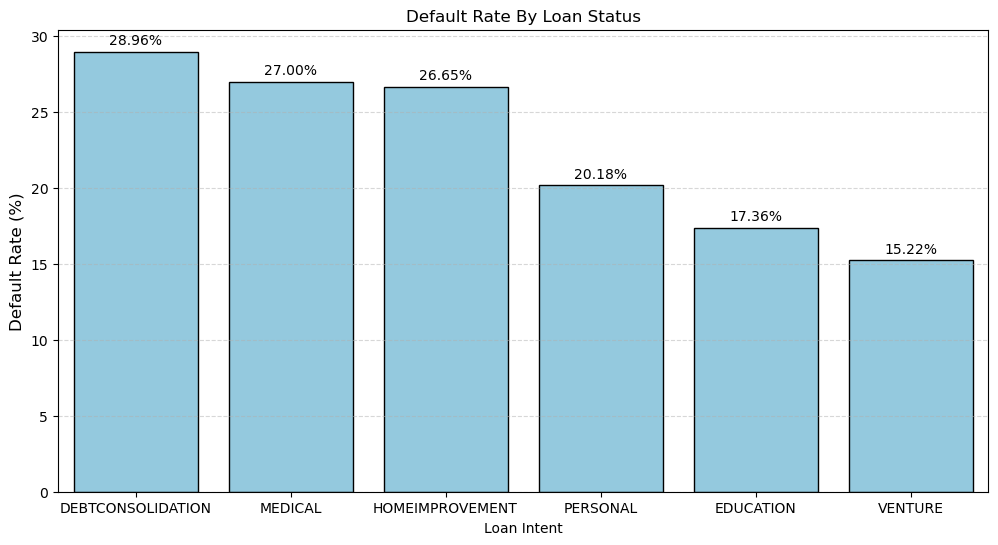

In [40]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=loan_intent_group_ratio, x='loan_intent', y='default_rate', color= 'skyblue',legend=False, edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=3)

plt.title('Default Rate By Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.5) 
plt.xlabel('Loan Intent')
plt.ylabel('Default Rate (%)', fontsize=12)
plt.show()

In [41]:
df_cleaned['loan_percent_income'].sort_values()

24437    0.01
13699    0.01
13950    0.01
27076    0.01
26464    0.01
         ... 
18203    0.76
571      0.77
577      0.77
23727    0.78
640      0.83
Name: loan_percent_income, Length: 30246, dtype: float64

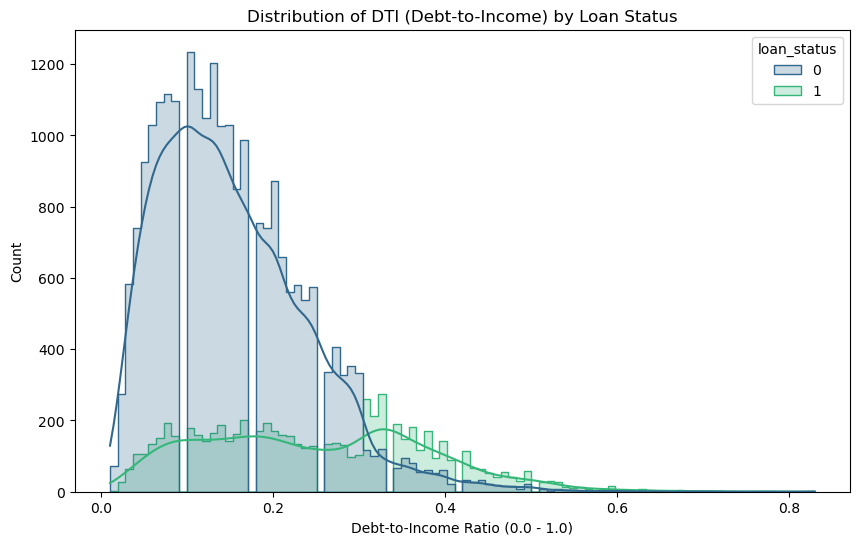

In [42]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_cleaned, x='loan_percent_income', hue='loan_status', kde=True, element="step", palette='viridis')

plt.title('Distribution of DTI (Debt-to-Income) by Loan Status')
plt.xlabel('Debt-to-Income Ratio (0.0 - 1.0)')
plt.ylabel('Count')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16584\755257631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='loan_grade', y='loan_percent_income', order=['A','B','C','D','E','F','G'], palette='magma_r')


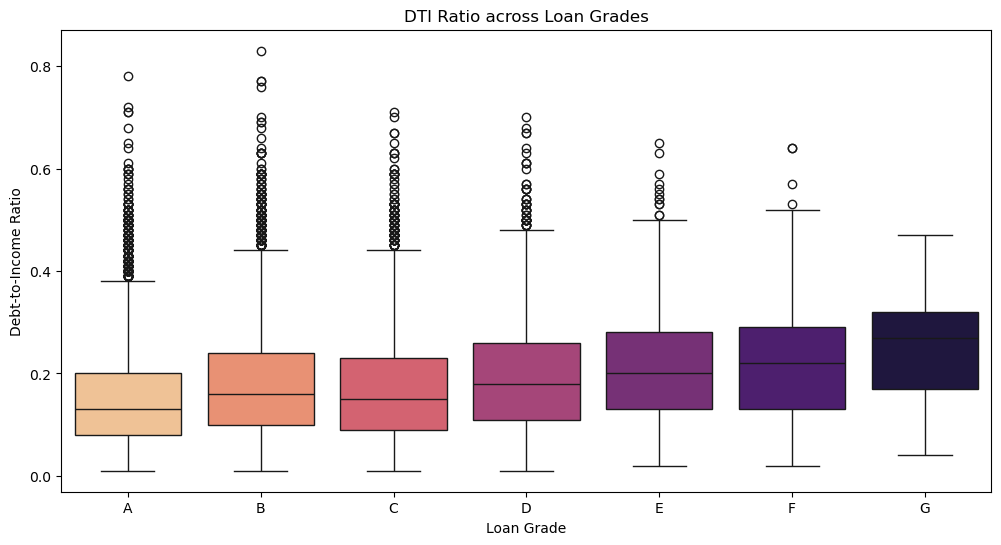

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='loan_grade', y='loan_percent_income', order=['A','B','C','D','E','F','G'], palette='magma_r')

plt.title('DTI Ratio across Loan Grades')
plt.xlabel('Loan Grade')
plt.ylabel('Debt-to-Income Ratio')
plt.show()


#จะเห็นได้ว้ากล่องจากเกรดที่ต่ำลง จะมีสัดส่วน dti ที่มากขึ้น

In [44]:
loan_grade_ratio = df_cleaned.pivot_table(index='loan_grade', columns='loan_status',values='loan_amnt', aggfunc='size')

loan_grade_ratio['total'] = loan_grade_ratio[0] + loan_grade_ratio[1]

loan_grade_ratio['default_rate'] = ((loan_grade_ratio[1] / loan_grade_ratio['total']) * 100 ).round(2)

loan_grade_ratio

loan_status,0,1,total,default_rate
loan_grade,,,,
A,8954,982,9936,9.88
B,8068,1600,9668,16.55
C,4785,1274,6059,21.03
D,1370,2037,3407,59.79
E,309,587,896,65.51
F,62,157,219,71.69
G,1,60,61,98.36


C:\Users\Admin\AppData\Local\Temp\ipykernel_16584\575366745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=loan_grade_ratio, x='loan_grade', y='default_rate',edgecolor='black', palette='magma_r')


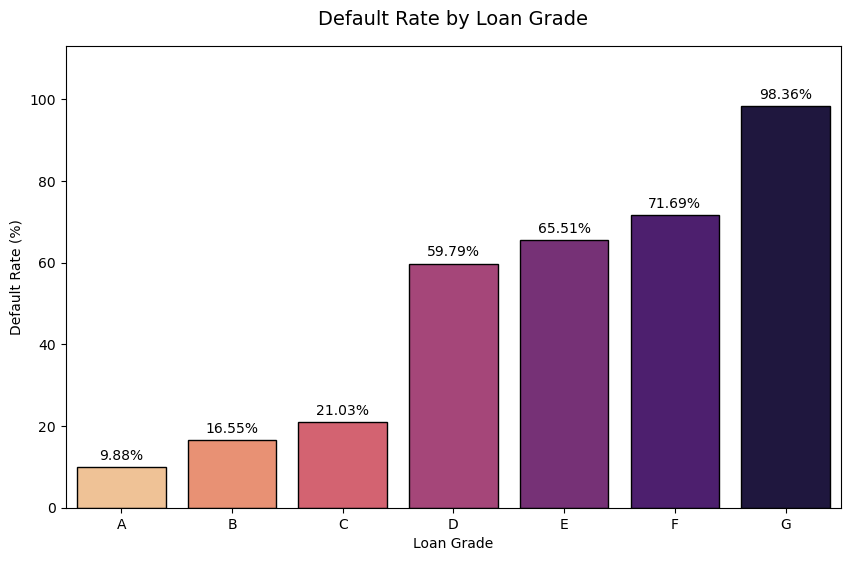

In [45]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=loan_grade_ratio, x='loan_grade', y='default_rate',edgecolor='black', palette='magma_r')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=3)

# 4. ตกแต่งเพิ่มเติม
plt.title('Default Rate by Loan Grade', fontsize=14, pad=15)
plt.ylabel('Default Rate (%)')
plt.xlabel('Loan Grade')
plt.ylim(0, loan_grade_ratio['default_rate'].max() * 1.15)

plt.show()



# Part 5 : Conclusion

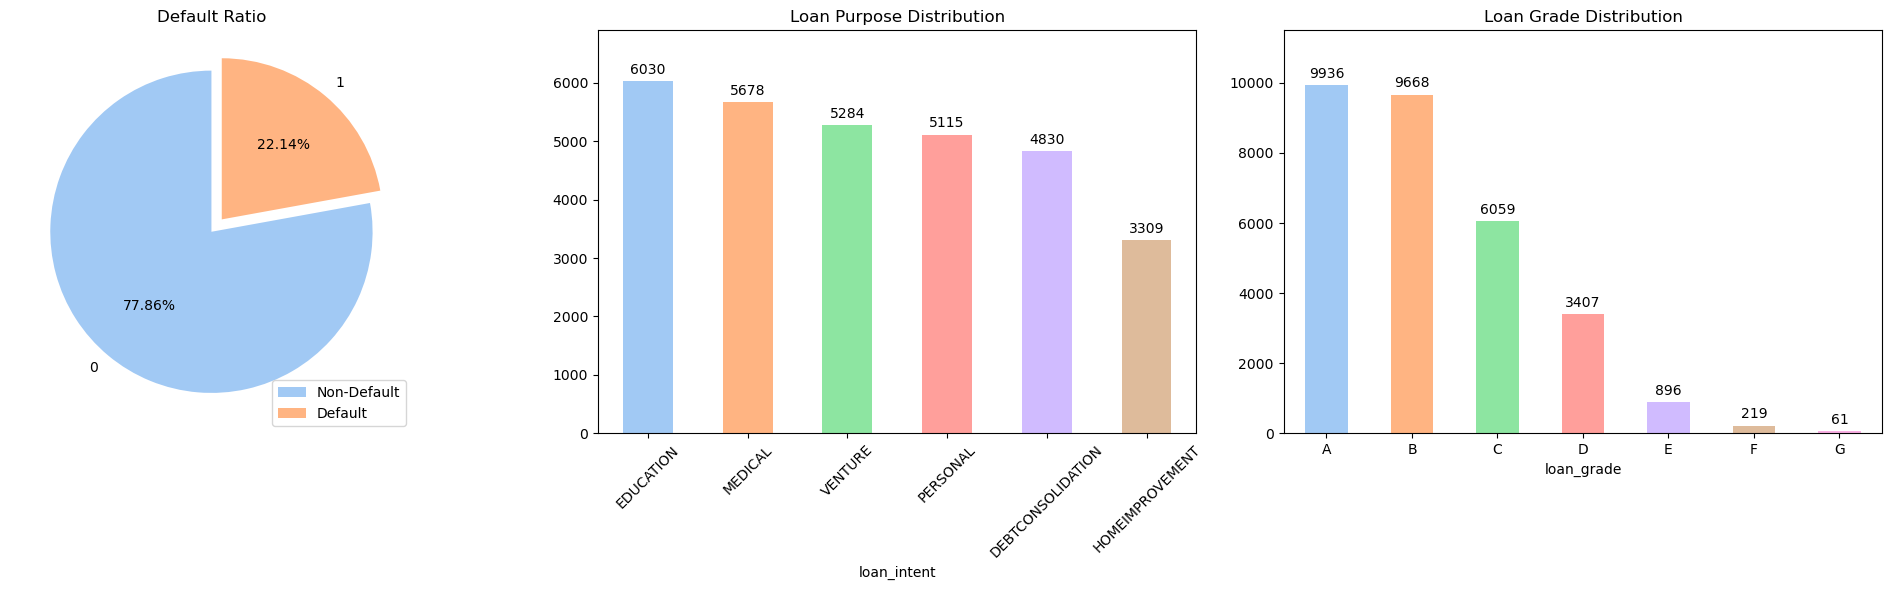

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

#ax1
df_cleaned['loan_status'].value_counts().plot(kind='pie' , startangle=90, autopct='%1.2f%%', colors=pastel, explode=(0, 0.1), ax=ax1)
ax1.set_title('Default Ratio')
ax1.legend(labels=['Non-Default', 'Default'])
ax1.set_ylabel('')

#ax2
df_cleaned['loan_intent'].value_counts().plot(kind='bar',color=pastel, ax=ax2)
ax2.set_title('Loan Purpose Distribution')
ax2.bar_label(ax2.containers[0], label_type='edge', padding=3, fontsize=10)
ax2.set_ylabel('')
ax2.set_ylim(0,6000 *1.15)
ax2.tick_params(axis='x', rotation=45)

#ax3
ax3 = df_cleaned['loan_grade'].value_counts().plot(kind='bar' , color=pastel)

ax3.bar_label(ax3.containers[0], label_type='edge', padding=3, fontsize=10)
ax3.set_title('Loan Grade Distribution')
ax3.set_ylabel('')
ax3.set_ylim(0,10000 *1.15)
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

#### Data Overview

1.Default Ratio
With a default rate of 22.14% (nearly 25%), our initial findings indicate a significant risk level. This necessitates deeper analysis to identify key drivers and implement strategies to lower this rate.

2.Loan Purpose Distribution
The loan requests are categorized into six primary intents. Ranked from highest to lowest volume, the distribution is as follows: Education, Medical, Venture, Personal, Debt Consolidation, and Home Improvement.

3.Loan Grade Distribution
The majority of customers are concentrated in Grades A and B (nearly 20,000 cases), while high-risk grades (E, F, G) remain minimal. This suggests that the current lending policy is relatively conservative.

##

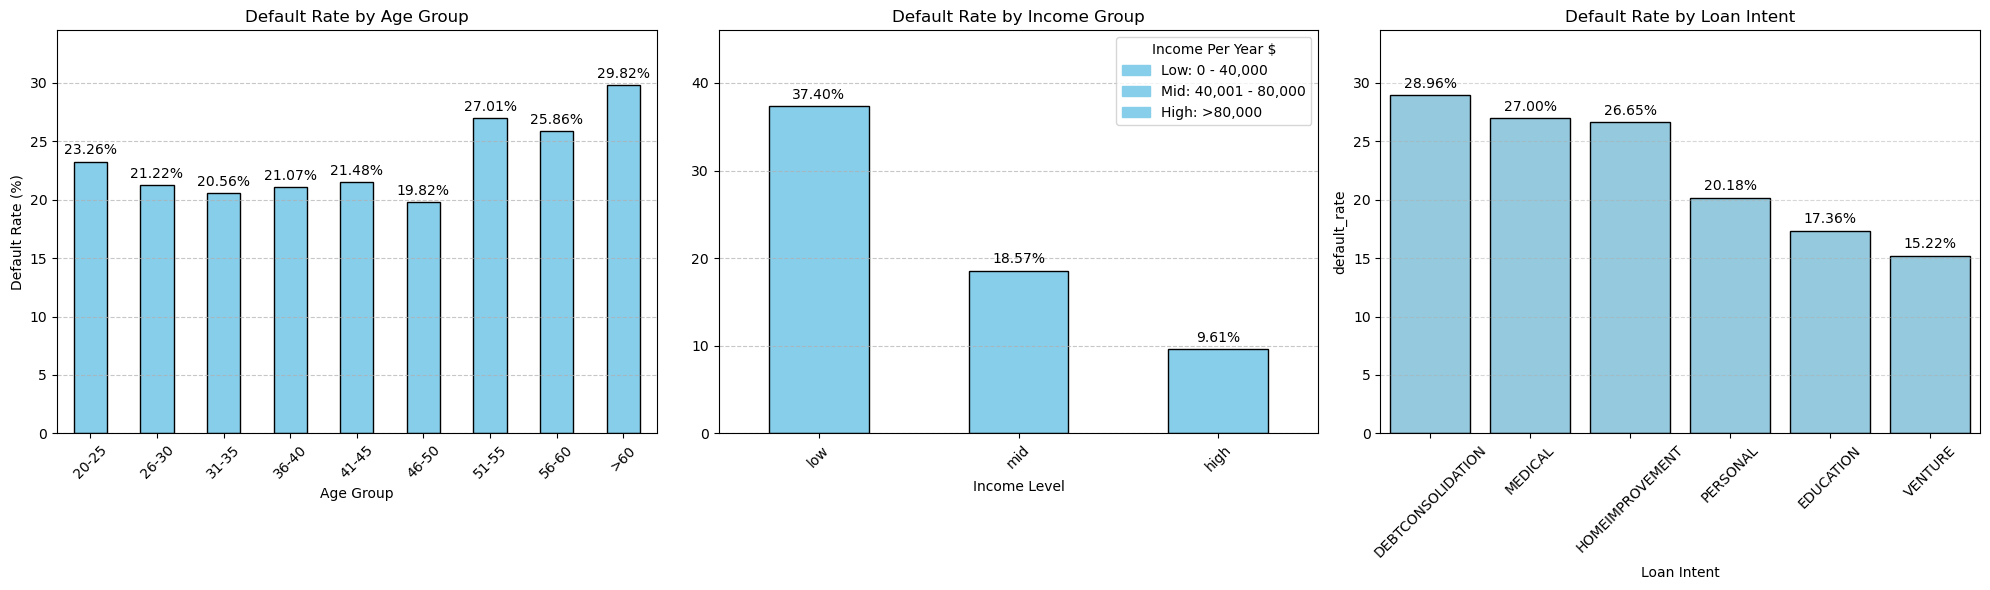

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

#ax1
age_group_ratio['default_rate'].plot(kind='bar', color='skyblue', edgecolor='black', ax=ax1)
ax1.bar_label(ax1.containers[0], padding=3, fmt='%.2f%%')
ax1.set_title('Default Rate by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Default Rate (%)')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0,30*1.15)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

#ax2
income_group_ratio['default_rate'].plot(kind='bar', color='skyblue', edgecolor='black', ax=ax2)
ax2.bar_label(ax2.containers[0], padding=3, fmt='%.2f%%')
ax2.legend(handles=[low_patch, mid_patch, high_patch], 
          title="Income Per Year $", 
          loc='upper right')
ax2.set_title('Default Rate by Income Group')
ax2.set_xlabel('Income Level')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0,40*1.15)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

#ax3
sns.barplot(data=loan_intent_group_ratio, x='loan_intent', y='default_rate', 
            color='skyblue', legend=False, edgecolor='black', ax=ax3)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.2f%%', padding=3)
ax3.set_title('Default Rate by Loan Intent')
ax3.set_xlabel('Loan Intent')
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylim(0,30*1.15)
ax3.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

1.Default Rate by Age Group 
The highest default risk is concentrated among seniors (>60 years) at 29.82%, closely followed by the pre-retirement segment (51-55 years). Crucially, a default probability exceeding 25% is observed across all borrowers aged 51 and older.

2.Default Rate by Income Group
The chart reveals a clear negative correlation between income levels and default rates; as annual income increases, the likelihood of default significantly decreases. Consequently, the company’s lending policy should prioritize more stringent screening for borrowers earning under $40,000 per year to effectively mitigate potential losses.

3.Default Rate by Loan Intent
The top three categories with the highest default probability are Debt Consolidation, Medical, and Home Improvement. Consequently, stricter lending criteria should be implemented for these segments. Conversely, Venture, Education, and Personal loans exhibit the lowest risk profiles.
 



C:\Users\Admin\AppData\Local\Temp\ipykernel_16584\3041457316.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='loan_grade', y='loan_percent_income', order=['A','B','C','D','E','F','G'], palette='magma_r', ax=ax1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16584\3041457316.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loan_grade_ratio, x='loan_grade', y='default_rate',edgecolor='black', palette='magma_r', ax=ax2)


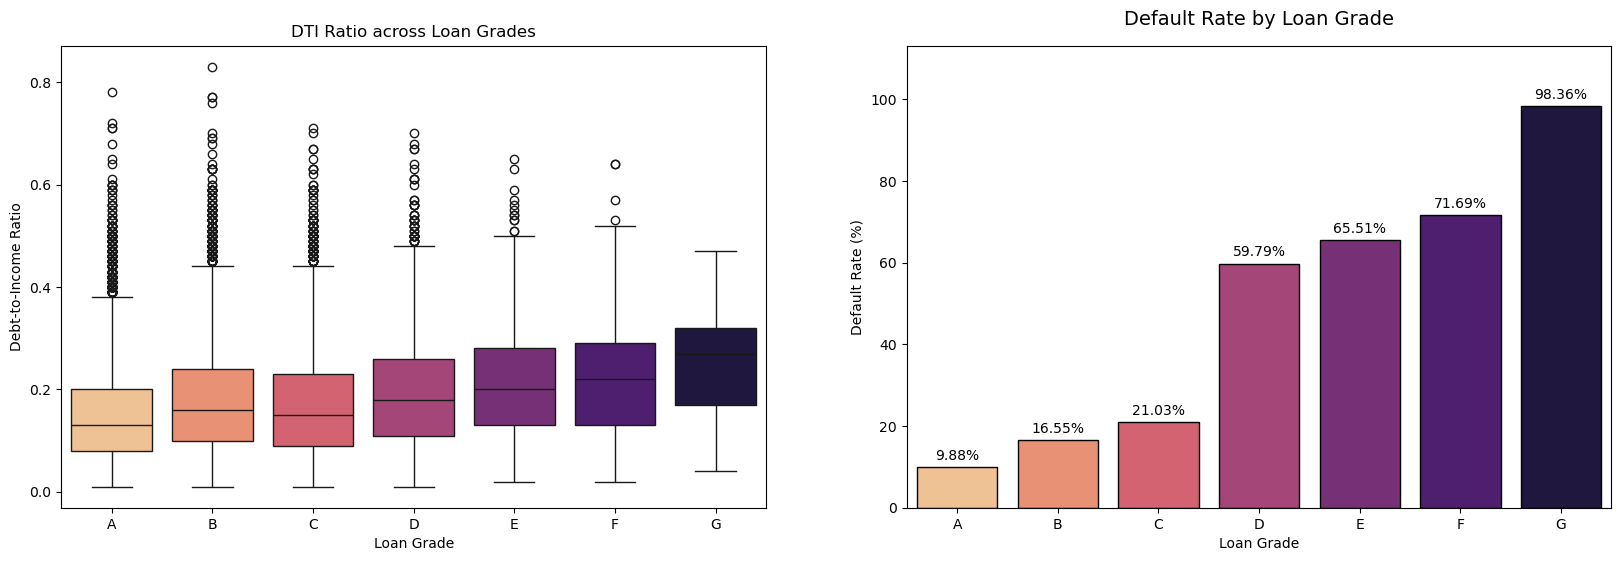

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

#ax1
sns.boxplot(data=df_cleaned, x='loan_grade', y='loan_percent_income', order=['A','B','C','D','E','F','G'], palette='magma_r', ax=ax1)

ax1.set_title('DTI Ratio across Loan Grades')
ax1.set_xlabel('Loan Grade')
ax1.set_ylabel('Debt-to-Income Ratio')

#ax2
sns.barplot(data=loan_grade_ratio, x='loan_grade', y='default_rate',edgecolor='black', palette='magma_r', ax=ax2)

for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f%%', padding=3)


ax2.set_title('Default Rate by Loan Grade', fontsize=14, pad=15)
ax2.set_ylabel('Default Rate (%)')
ax2.set_xlabel('Loan Grade')
ax2.set_ylim(0, loan_grade_ratio['default_rate'].max() * 1.15)


plt.show()

1.DTI Ratio across Loan Grades
The box plot demonstrates a positive correlation between the Debt-to-Income (DTI) ratio and Loan Grades. As the credit grade transitions from A to G, there is a consistent upward trend in median DTI levels. This validates that the bank's grading model effectively incorporates debt burden as a primary risk indicator. High-risk grades (E-G) not only show higher debt ratios but also exhibit greater variance, suggesting increased financial instability in these segments

2.Default Rate by Loan Grade
There is a clear positive relationship between loan grades and risk; as credit quality deteriorates from Grade A to G, we observe a significant and rapid escalation in default rates. Strategic Recommendation: "The default rate exceeds 50% from Grade D onwards, reaching an alarming 98.36% in Grade G. This suggests that the current lending criteria for these high-risk grades are unsustainable. The bank should consider ceasing lending operations for Grades D-G or implementing a Strict Risk-Based Pricing model to ensure that the interest income can sufficiently offset the high cost of default.


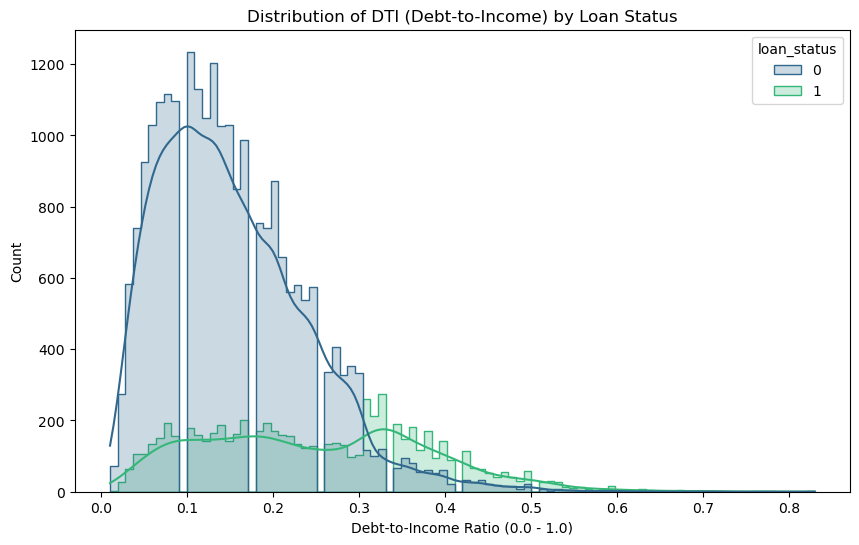

In [49]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_cleaned, x='loan_percent_income', hue='loan_status', kde=True, element="step", palette='viridis')

plt.title('Distribution of DTI (Debt-to-Income) by Loan Status')
plt.xlabel('Debt-to-Income Ratio (0.0 - 1.0)')
plt.ylabel('Count')
plt.xticks(np.arange(0, 0.9, 0.1))
plt.show()

The DTI distribution reveals a clear Decision Boundary at approximately 0.32. Beyond this intersection point, the probability density of default (green curve) surpasses that of non-default (blue curve). This indicates that a DTI ratio exceeding 32% is a strong predictor of credit risk, serving as an optimal threshold for loan approval criteria

### Strategic Insights and Recommendations

1.Loan Intent Prioritization
Loan intents such as Debt Consolidation and Medical expenses exhibit significantly higher default rates. This trend likely stems from the urgent nature of these financial needs, which often prevents borrowers from establishing effective repayment plans. Conversely, we should prioritize and support 'Education' and 'Venture' loans. Borrowers in these categories demonstrate a higher propensity for timely repayment, thereby safeguarding the lender's interests and ensuring portfolio stability

2.High-Risk Segment Tightening  
Our current grading system reveals a critical risk escalation: borrowers in Grade D and below exhibit default rates exceeding 50%, peaking at an uncontrollable 98% for Grade G. To mitigate these high-risk exposures, we propose the following strategic measures:

-Enhanced Due Diligence: Mandatory intensive manual review by credit officers for all applications within these grades.

-Risk-Based Pricing: Implement higher interest rates to ensure that the potential returns justify the extreme risk of default.

-Strict Collateral & Limits: Enforce mandatory collateral requirements and reduce maximum loan caps to minimize potential loss given default

3.DTI-Based Credit Approval Policy
KDE Plot analysis identifies the optimal cut-off point for the Debt-to-Income (DTI) ratio at 0.32. Beyond this threshold, the density of defaulting borrowers significantly outweighs that of non-defaulters. This indicates a critical risk pivot where the probability of default exceeds the likelihood of timely repayment. Consequently, we recommend intensive credit vetting for all applicants with a DTI of 0.32 or higher, as approving loans in this range poses a high risk of net financial loss to the lender.


# Part 6 : Prediction (Bonus)

In [50]:
df_pred = df_cleaned.copy()

In [51]:
df_pred.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
age_group                     0
income_group                  0
dtype: int64

In [52]:
#dummy 
#change 'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6

df_pred['loan_grade_dum'] = df_pred['loan_grade'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6})

df_pred['loan_grade_dum'].unique()

array([1, 2, 0, 3, 4, 5, 6])

In [53]:
df_pred = pd.get_dummies(df_pred, columns=['loan_intent'])

In [54]:
#0: No prior default history
#1: Previous default history
df_pred['cb_person_default_on_file'] = df_pred['cb_person_default_on_file'].map({'N': 0, 'Y': 1})

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

loan_pred = ['loan_percent_income', 'person_income', 'loan_amnt', 'person_age', 'cb_person_cred_hist_length', 'loan_grade_dum','loan_intent_DEBTCONSOLIDATION','loan_intent_EDUCATION','loan_intent_HOMEIMPROVEMENT','loan_intent_MEDICAL','loan_intent_PERSONAL','loan_intent_VENTURE']

X = df_pred[loan_pred] 
y = df_pred['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4679
           1       0.78      0.67      0.72      1371

    accuracy                           0.88      6050
   macro avg       0.84      0.81      0.82      6050
weighted avg       0.88      0.88      0.88      6050



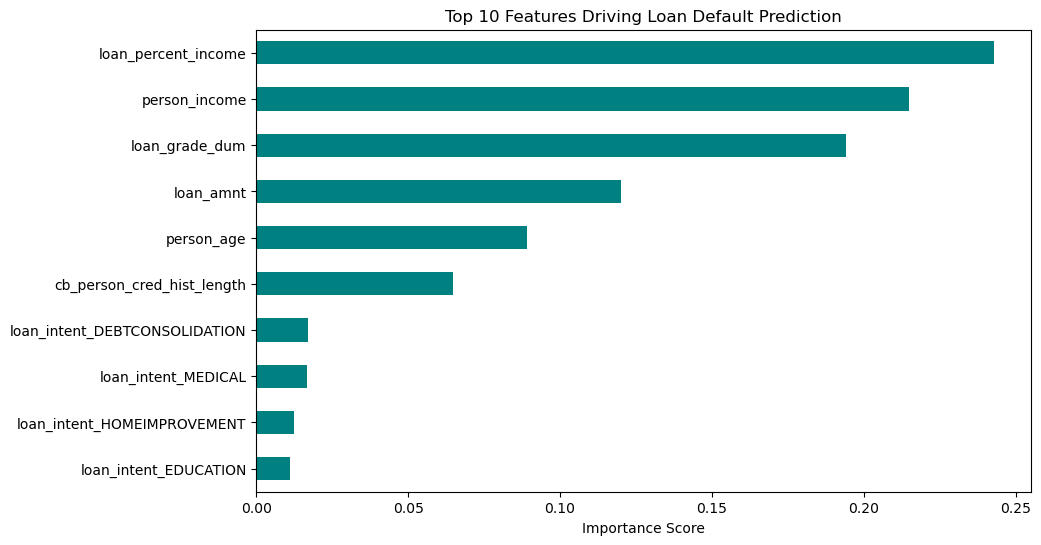

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)


importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10, 6), color='teal')
plt.title('Top 10 Features Driving Loan Default Prediction')
plt.xlabel('Importance Score')
plt.show()

In [ ]:
df_pred.sample(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_grade_dum,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
28432,31,135000,MORTGAGE,12.0,C,15000,13.85,0,0.11,1,9,31-35,high,2,False,True,False,False,False,False


In [58]:
#loan_pred = ['loan_percent_income', 'person_income', 'loan_amnt', 'person_age', 'cb_person_cred_hist_length',
#  'loan_grade_dum','loan_intent_DEBTCONSOLIDATION','loan_intent_EDUCATION',
# 'loan_intent_HOMEIMPROVEMENT','loan_intent_MEDICAL','loan_intent_PERSONAL','loan_intent_VENTURE']

new_user = [[0.19,43000,8000,28,10,0,0,0,1,0,0,0]]

model.predict(new_user)





c:\Users\Admin\anaconda3\envs\python_course\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [59]:
proba = model.predict_proba(new_user)
print(f"โอกาสที่จะจ่ายตรงงวด (0): {proba[0][0]*100:.2f}%")
print(f"โอกาสที่จะเบี้ยวหนี้ (1): {proba[0][1]*100:.2f}%")

โอกาสที่จะจ่ายตรงงวด (0): 99.00%
โอกาสที่จะเบี้ยวหนี้ (1): 1.00%


c:\Users\Admin\anaconda3\envs\python_course\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
